In [1]:
import pandas as pd
import numpy as np

# Results

In [6]:
result_example = 'E:/User/bruna.fistarol/Documents/GitHub/Mestrado-EMAp/Staphylococcus_aureus/Results/model_gset_1_0/all/f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

experiments = pd.MultiIndex.from_product([['Length_1', 'Length_2', 'Length_3', 'Length_4'], [0, 1, 2, 3, 4]])

results = pd.DataFrame(index = antibiotics, columns = experiments)

In [7]:
for i in [1, 2, 3]: #path length
    for j in [0, 1, 2, 3, 4]: #replicate
        result_file = f'E:/User/bruna.fistarol/Documents/GitHub/Mestrado-EMAp/Staphylococcus_aureus/Results/model_gset_{i}_{j}/all/f1.tab'
        with open(result_file, 'r') as result:
            for line in result:
                values = line.split('\t')
                results.loc[values[0]][f'Length_{i}'][j] = np.around(float(values[1]), decimals = 3)

In [14]:
mean_results = pd.DataFrame(index = antibiotics, columns = ['Length_1', 'Length_2', 'Length_3'])

for i in [1, 2, 3]: #path length
    mean_results[f'Length_{i}'] = results.loc[antibiotics][f'Length_{i}'].mean(axis = 1)

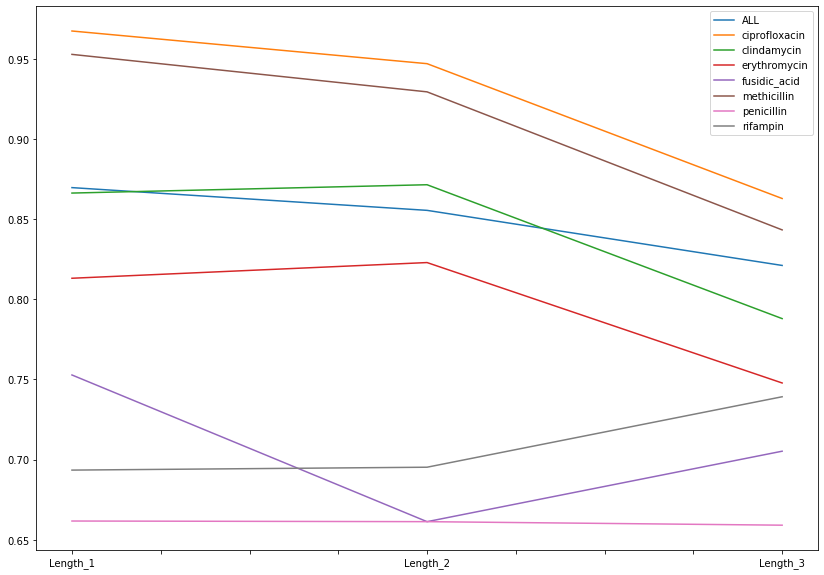

In [15]:
mean_results.T.plot(figsize = (14,10)).legend(loc='upper right')

In [16]:
mean_results

,Length_1,Length_2,Length_3
ALL,0.8698,0.8556,0.8212
ciprofloxacin,0.9676,0.9472,0.8630
clindamycin,0.8664,0.8716,0.7880
erythromycin,0.8132,0.8230,0.7478
fusidic_acid,0.7528,0.6612,0.7052
methicillin,0.9530,0.9296,0.8434
penicillin,0.6616,0.6612,0.6590
rifampin,0.6934,0.6952,0.7392
